<ipython-input-1-23378bec6da5>:20: FutureWarning: The default value of regex will change from True to False in a future version.
  fake_df.columns = ((fake_df.columns.str).replace("^ ","")).str.replace(" $","")
<ipython-input-1-23378bec6da5>:20: FutureWarning: The default value of regex will change from True to False in a future version.
  fake_df.columns = ((fake_df.columns.str).replace("^ ","")).str.replace(" $","")
<ipython-input-1-23378bec6da5>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  real_df.columns = ((real_df.columns.str).replace("^ ","")).str.replace(" $","")
<ipython-input-1-23378bec6da5>:24: FutureWarning: The default value of regex will change from True to False in a future version.
  real_df.columns = ((real_df.columns.str).replace("^ ","")).str.replace(" $","")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23481 entries, 0 to 23480
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    23481 non-null  object
 1   text     23481 non-null  object
 2   subject  23481 non-null  object
 3   date     23481 non-null  object
dtypes: object(4)
memory usage: 733.9+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    21417 non-null  object
 1   text     21417 non-null  object
 2   subject  21417 non-null  object
 3   date     21417 non-null  object
dtypes: object(4)
memory usage: 669.4+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 44898 entries, 0 to 21416
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44898 non-null  object
 1   text     44898 non-null  object


1    23481
0    21417
Name: isFake, dtype: int64

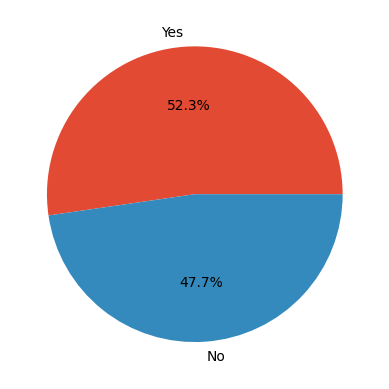

In [ ]:
#loading the relevant libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import seaborn as sns
plt.style.use('ggplot')

# Since Jupyter notebook is used, include:
%matplotlib inline

# Load your dataset


with open ('/content/drive/MyDrive/Fake.csv', "r") as file:
        fake_df = pd.read_csv(file, delimiter = ",")
        fake_df.columns = ((fake_df.columns.str).replace("^ ","")).str.replace(" $","")

with open ('/content/drive/MyDrive/True.csv', "r") as file:
        real_df = pd.read_csv(file, delimiter = ",")
        real_df.columns = ((real_df.columns.str).replace("^ ","")).str.replace(" $","")


# fake_df = pd.read_csv('/content/drive/MyDrive/Fake.csv')
# real_df = pd.read_csv('/content/drive/MyDrive/True.csv')

fake_df.info()      # Returns a concise summary of dataset
real_df.info()      # Returns a concise summary of dataset

fake_df.head()
real_df.head()
# Handle missing values
fake_df.dropna(inplace=True)
real_df.dropna(inplace=True)

#confirm the size of null values if any
fake_df.isnull().sum()
real_df.isnull().sum()

# Remove irrelevant features. They are removed because they will not contribute to model fitting
fake_df.drop(['date'], axis=1, inplace=True)
real_df.drop(['date'], axis=1, inplace=True)
# fake_df.drop(['date', 'text', 'subject'], axis=1, inplace=True)
# real_df.drop(['date', 'text', 'subject'], axis=1, inplace=True)

#classification
fake_df['isFake'] = 1 #1 means true (that implies the news is fake)
real_df['isFake'] = 0  #0 means false (that implies the news is NOT fake)

#uncomment to see categories in the plots (Class Visualization Using Bar Chart)
# fake_df['isFake'] = 'Yes' #1 means true (that implies the news is fake)
# real_df['isFake'] = 'No'  #0 means false (that implies the news is NOT fake)

# Taking a look at the target variable
real_df.isFake.value_counts()       # The value_counts() function is used to get a Series containing counts of unique values.

#combine both fake_df and real_df into one for further cleaning

data = pd.concat([fake_df,real_df])
data.info()      # Returns a concise summary of dataset

data.isnull().sum() / len(data) * 100   # To get percentage of missing data in each column. Notice, we don't have any column with missing value.

#check data shape
data.shape
piechart=data['isFake'].value_counts()
label=('Yes','No')
plt.pie(piechart,labels=label,autopct='%1.1f%%')
piechart

In [ ]:
data.title.value_counts()
data.text.value_counts()
data.subject.value_counts()

politicsNews       11272
worldnews          10145
News                9050
politics            6841
left-news           4459
Government News     1570
US_News              783
Middle-east          778
Name: subject, dtype: int64

In [ ]:
# Remove Stop Words
#import libraries to help remove stop words
import nltk
import re
import plotly.express as px
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

def cleanTxt(text):
    text = re.sub('\w+:\/\/\S+', '', text)# remove hyperlink
    text = re.sub('[^a-zA-Z]', ' ', text)
    text = re.sub(r'@\w+|#\w+', '', text) #remove @mentions
    text.lower() #the model should detect both lower and upper case characters, therefore all text will be lower case
    return text
# data['title']=data['title'].apply(cleanTxt)
data['text']=data['text'].apply(cleanTxt)

nltk.download('stopwords')
#stemming,remove stop words and numbers
stopwords_english = stopwords.words('english')
stemmer = PorterStemmer()

def stemming(text):
    text = text.split()
    text=[stemmer.stem(y) for y in text]
    return " " .join(text)

def remove_numbers(text):
    text=''.join([i for i in text if not i.isdigit()])
    return text

def remove_stop_words(text):

    Text=[i for i in str(text).split() if i not in stopwords_english]
    return " ".join(Text)

# def normalize_title(df):
#     df.title=df.title.apply(lambda title : remove_stop_words(title))
#     df.title=df.title.apply(lambda title : stemming(title))
#     df.title=df.title.apply(lambda title : remove_numbers(title))
#     return df

def normalize_text(df):
    df.text=df.text.apply(lambda text : remove_stop_words(text))
    df.text=df.text.apply(lambda text : stemming(text))
    df.text=df.text.apply(lambda text : remove_numbers(text))
    return df

# normalize_title(data)
normalize_text(data)
#text after preprocessing
data.head(3)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


,title,text,subject,isFake
0,Donald Trump Sends Out Embarrassing New Year’...,donald trump wish american happi new year leav...,News,1
1,Drunk Bragging Trump Staffer Started Russian ...,hous intellig committe chairman devin nune go ...,News,1
2,Sheriff David Clarke Becomes An Internet Joke...,on friday reveal former milwauke sheriff david...,News,1


In [ ]:
import tensorflow as tf
keras = tf.keras
Tokenizer = keras.preprocessing.text.Tokenizer

#Tokenization
max_vocab = 10000
tokenizer = Tokenizer(num_words=max_vocab)
tokenizer.fit_on_texts(data)

In [ ]:
# Process String into correct numerical formats (For Logistic Regression)

def calculation(df,column):
  column_contents = []
  for row in df[column]:
    if type(row) not in (int,float):
      column_contents.append(row)

  unique_contents = set(column_contents)
  ds = {}
  for i,j in enumerate(unique_contents):
    ds[j] = i

  df[column] = df[column].replace(ds.keys(), list(map(str, ds.values()))).astype(float)

for column in data:
  calculation(data,column)

print (data.dtypes)

title      float64
text       float64
subject    float64
isFake     float64
dtype: object


In [ ]:
data['title'].head()
data['text'].head()
data['subject'].head()

0    3.0
1    3.0
2    3.0
3    3.0
4    3.0
Name: subject, dtype: float64

<Axes: xlabel='isFake'>

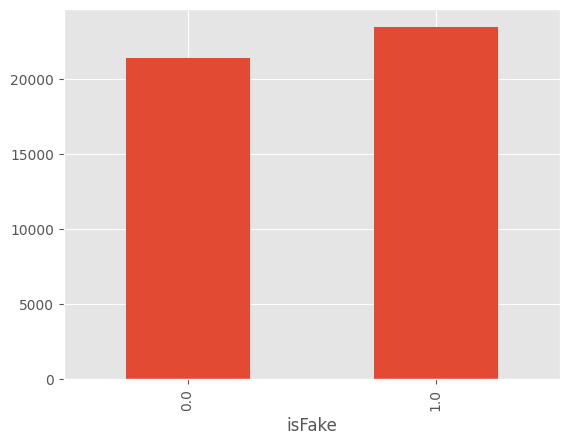

In [ ]:
#Class Visualization Using Bar Chart
# data['isFake'].value_counts().plot(kind='bar')
data.groupby('isFake').size().plot(kind='bar')
#data['isFake'].value_counts(sort=False).plot.bar(rot=0)

In [ ]:
#Assessing all the categorical columns and numerical columns
cat_cols = data.select_dtypes(include = 'object').columns    # getting all the categorical columns
cat_cols
num_cols = data.select_dtypes(include=np.number).columns      # getting all the numerical columns
num_cols

Index(['title', 'text', 'subject', 'isFake'], dtype='object')

In [ ]:
# Separate input features and output feature
X = data.drop(columns = ['isFake'])       # input features
Y = data.isFake


#To avoid data leakage,the train-test split technique will be employed.
#The train-test split technique (also known as hold-out) involves dividing the available data into two parts: one dedicated to training and the other to evaluation.

# Splitting the data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)

# X_train: independent feature data for training the model
# Y_train: dependent feature data for training the model
# X_test: independent feature data for testing the model; will be used to predict the target values
# Y_test: original target values of X_test; We will compare this values with our predicted values.

# test_size = 0.3: 30% of the data will go for test set and 70% of the data will go for train set
# random_state = 42: this will fix the split i.e. there will be same split for each time you run the code



In [ ]:
#Class Imbalance assessment
data.isFake.value_counts()

1.0    23481
0.0    21417
Name: isFake, dtype: int64

In [ ]:
#Handling Class Imbalancing Issue using Undersampling.
#Undersampling can be defined as removing some observations of the majority class

<Axes: xlabel='isFake'>

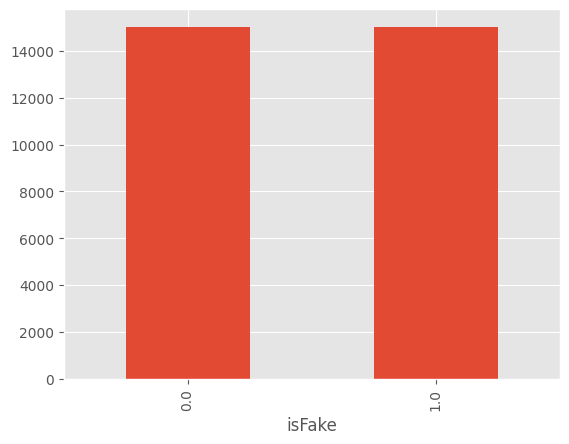

In [ ]:
# Handling Class Imbalancing Issue for *train* data using Undersampling.

# concatenate training data back together
train_data = pd.concat([X_train, Y_train], axis = 1)

# separate minority and majority class
not_fake = train_data[train_data.isFake==0]
fake = train_data[train_data.isFake==1]

# 'resample' is located under sklearn.utils
from sklearn.utils import resample

# Unsample minority; we are oversampling the minority class to match the number of majority class
fake_balanced = resample(fake,
                           replace = True, # Sample with replacement
                           n_samples = len(not_fake), # Match number in majority class
                           random_state=27)

# combine majority and upsampled minority
balanced_train_data = pd.concat([not_fake, fake_balanced])

# Now, check the classes count for train data shows the classes are now equal
balanced_train_data.isFake.value_counts()
balanced_train_data.groupby('isFake').size().plot(kind='bar')

<Axes: xlabel='isFake'>

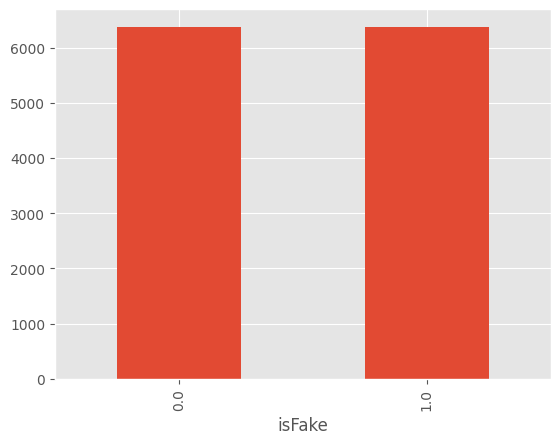

In [ ]:
# Handling Class Imbalancing Issue for *test* data using Undersampling.

# concatenate testing data back together
test_data = pd.concat([X_test, Y_test], axis = 1)

# separate minority and majority class
not_fake = test_data[test_data.isFake==0]
fake = test_data[test_data.isFake==1]

# 'resample' is located under sklearn.utils
from sklearn.utils import resample

# Unsample minority; we are oversampling the minority class to match the number of majority class
fake_balanced = resample(fake,
                           replace = True, # Sample with replacement
                           n_samples = len(not_fake), # Match number in majority class
                           random_state=27)

# combine majority and upsampled minority
balanced_test_data = pd.concat([not_fake, fake_balanced])

# Now, check the classes count for test data shows the classes are now equal
balanced_test_data.isFake.value_counts()
balanced_test_data.groupby('isFake').size().plot(kind='bar')

In [ ]:
#Proper resampling of the train data using k-fold cross validation
#Split the train data into 10 smaller samples, i.e. k=10
def kfold_indices(data, k):
    fold_size = len(data) // k
    indices = np.arange(len(data))
    folds = []
    for i in range(k):
        test_indices = indices[i * fold_size: (i + 1) * fold_size]
        train_indices = np.concatenate([indices[:i * fold_size], indices[(i + 1) * fold_size:]])
        folds.append((train_indices, test_indices))
    return folds

# Define the number of folds (K)
k = 10

# Get the fold indices
fold_indices = kfold_indices(balanced_train_data, k)
fold_indices #10 smaller samples

[(array([ 3007,  3008,  3009, ..., 30073, 30074, 30075]),
  array([   0,    1,    2, ..., 3004, 3005, 3006])),
 (array([    0,     1,     2, ..., 30073, 30074, 30075]),
  array([3007, 3008, 3009, ..., 6011, 6012, 6013])),
 (array([    0,     1,     2, ..., 30073, 30074, 30075]),
  array([6014, 6015, 6016, ..., 9018, 9019, 9020])),
 (array([    0,     1,     2, ..., 30073, 30074, 30075]),
  array([ 9021,  9022,  9023, ..., 12025, 12026, 12027])),
 (array([    0,     1,     2, ..., 30073, 30074, 30075]),
  array([12028, 12029, 12030, ..., 15032, 15033, 15034])),
 (array([    0,     1,     2, ..., 30073, 30074, 30075]),
  array([15035, 15036, 15037, ..., 18039, 18040, 18041])),
 (array([    0,     1,     2, ..., 30073, 30074, 30075]),
  array([18042, 18043, 18044, ..., 21046, 21047, 21048])),
 (array([    0,     1,     2, ..., 30073, 30074, 30075]),
  array([21049, 21050, 21051, ..., 24053, 24054, 24055])),
 (array([    0,     1,     2, ..., 30073, 30074, 30075]),
  array([24056, 24057, 2

In [ ]:
# Separate input features and output feature (for balanced train data)
X_train = balanced_train_data.drop(columns = ['isFake'])       # input features
Y_train = balanced_train_data.isFake


# Separate input features and output feature (for balanced test data)
X_test = balanced_test_data.drop(columns = ['isFake'])       # input features
Y_test = balanced_test_data.isFake

In [ ]:
X_train

,title,text,subject
18187,4316.0,11945.0,1.0
3329,21701.0,6034.0,2.0
7486,1450.0,16777.0,2.0
2591,10722.0,8604.0,2.0
17903,37622.0,8137.0,1.0
...,...,...,...
6474,3758.0,2091.0,3.0
7693,24631.0,31126.0,3.0
906,9097.0,4688.0,3.0
11618,8468.0,14518.0,7.0


In [ ]:
print(X_train.columns.tolist())

['title', 'text', 'subject']


In [ ]:

#import relevant libraries
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression  # Replace with each model that works with numeric data
import tensorflow as tf
from tensorflow.keras import layers
from sklearn.metrics import accuracy_score , ConfusionMatrixDisplay , classification_report , roc_curve
from sklearn.metrics import roc_auc_score

#specify functions to train data and report/plot accuracies
from keras import backend as K
def f1(y_true, y_pred):
    '''
    metric from here
    https://stackoverflow.com/questions/43547402/how-to-calculate-f1-macro-in-keras
    '''
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    print("precision: ",precision)
    print("recall: ",recall)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

def train(model , model_name):
    model.fit(X_train,Y_train)
    print("")
    print("Training Data Results")
    print(f"Training accuracy of {model_name} is {model.score(X_train,Y_train)}")
    # print("f1-score: ",f1(Y_train, model.predict(X_train).astype(float)))

    train_pred = model.predict(X_train).astype(float)
    print("f1-score: ",f1(Y_train, train_pred))
    ROC_AUC = roc_auc_score(Y_train, train_pred)
    print('ROC AUC : {:.4f}'.format(ROC_AUC))


    print("")

    print("Testing Data Results")
    print(f"Testing accuracy of {model_name} is {model.score(X_test,Y_test)}")
    # print(f"Prediction of {model_name} is {model.predict(X_test)}")
    test_pred = model.predict(X_test).astype(float)
    print("f1-score: ",f1(Y_test, test_pred))
    ROC_AUC = roc_auc_score(Y_test, test_pred)
    print('ROC AUC : {:.4f}'.format(ROC_AUC))

def conf_matrix(model):
    ConfusionMatrixDisplay.from_estimator(
        model,
        X_test,
        Y_test,cmap=plt.cm.Blues
    )
def class_report(model):
    print(classification_report(
        Y_test,
        model.predict(X_test)
    ))






K-Fold Cross-Validation Scores: [0.8002821758896379, 0.8002821758896379, 0.8002821758896379, 0.8002821758896379, 0.8002821758896379, 0.8002821758896379, 0.8002821758896379, 0.8002821758896379, 0.8002821758896379, 0.8002821758896379]
Mean Accuracy: 0.8002821758896379

Training Data Results
Training accuracy of LogisticRegression is 0.8001396462295518
precision:  tf.Tensor(0.7851772287812903, shape=(), dtype=float64)
recall:  tf.Tensor(0.8263731879184307, shape=(), dtype=float64)
f1-score:  tf.Tensor(0.8052486135622065, shape=(), dtype=float64)
ROC AUC : 0.8001

Testing Data Results
Testing accuracy of LogisticRegression is 0.8002821758896379
precision:  tf.Tensor(0.7881751165820946, shape=(), dtype=float64)
recall:  tf.Tensor(0.8212886032164715, shape=(), dtype=float64)
f1-score:  tf.Tensor(0.8043911675736879, shape=(), dtype=float64)
ROC AUC : 0.8003


Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

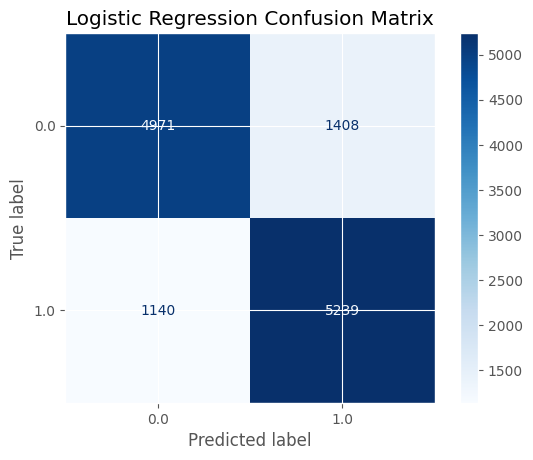

In [ ]:
#Logistic Regression

# Initialize the machine learning model (e.g., Logistic Regression)
reg_model = LogisticRegression()


# Initialize a list to store the evaluation scores
scores = []

# Iterate through each fold
for train_indices, test_indices in fold_indices:
    #1. Logistic Regression
    # Train the model on the training data
    reg_model.fit(X_train, Y_train)

    # Make predictions on the test data
    y_pred = reg_model.predict(X_test)

    # Calculate the accuracy score for this fold
    fold_score = accuracy_score(Y_test, y_pred)

    # Append the fold score to the list of scores
    scores.append(fold_score)


# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(scores)
print("K-Fold Cross-Validation Scores:", scores)
print("Mean Accuracy:", mean_accuracy)



train(reg_model, 'LogisticRegression')
# conf_matrix(reg_model)
disp = ConfusionMatrixDisplay.from_estimator(
        reg_model,
        X_test,
        Y_test,cmap=plt.cm.Blues
    )
disp.ax_.set_title("Logistic Regression Confusion Matrix")

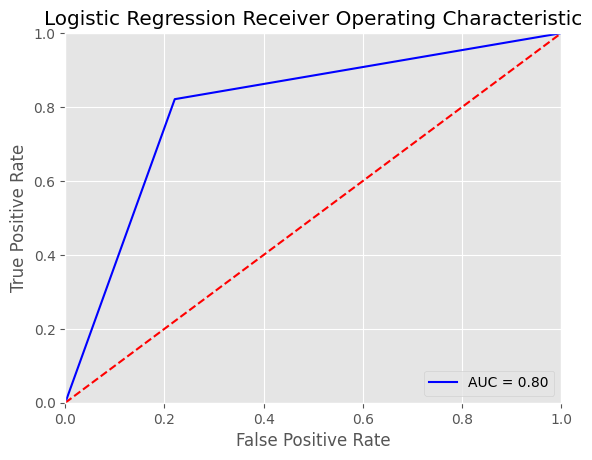

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
# probs = reg_model.predict_proba(X_test)
preds = reg_model.predict(X_test).astype(float)
# preds = probs[:,1]
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = roc_auc_score(Y_test, preds)

#load the pyplot tool from matplotlib library
import matplotlib.pyplot as plt
plt.title('Logistic Regression Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [ ]:

# For Naїve Bayes, kindly refer to the notebook: naive_bayes_machine_learning.ipynb



In [ ]:
#Random Forest Regressor

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


clf = RandomForestRegressor(n_estimators=10000, random_state=0, n_jobs=-1)

# Initialize a list to store the evaluation scores
scores = []

# Iterate through each fold
for train_indices, test_indices in fold_indices:
    # Train the model on the training data
    clf.fit(X_train,np.ravel(Y_train))

    # # Make predictions on the test data
    y_pred = clf.predict(X_test)

    # Calculate the accuracy score for this fold
    fold_score = accuracy_score(Y_test, y_pred)

    # Append the fold score to the list of scores
    scores.append(fold_score)


# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(scores)
print("K-Fold Cross-Validation Scores:", scores)
print("Mean Accuracy:", mean_accuracy)

train(clf, 'RandomForestRegressor')

K-Fold Cross-Validation Scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Mean Accuracy: 1.0

Training Data Results
Training accuracy of RandomForestRegressor is 1.0
precision:  tf.Tensor(0.9999999999933501, shape=(), dtype=float64)
recall:  tf.Tensor(0.9999999999933501, shape=(), dtype=float64)
f1-score:  tf.Tensor(0.9999999499933526, shape=(), dtype=float64)
ROC AUC : 1.0000

Testing Data Results
Testing accuracy of RandomForestRegressor is 1.0
precision:  tf.Tensor(0.9999999999843235, shape=(), dtype=float64)
recall:  tf.Tensor(0.9999999999843235, shape=(), dtype=float64)
f1-score:  tf.Tensor(0.9999999499843261, shape=(), dtype=float64)
ROC AUC : 1.0000


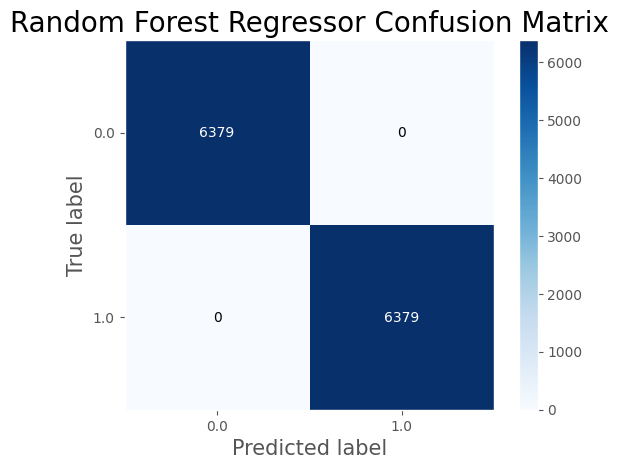

In [ ]:
#if you require the normalized confusion matrix. Install scikit-plot on the terminal:
# pip install scikit-plot
#then uncomment and run the succeeding commands:
import scikitplot as skplt
skplt.metrics.plot_confusion_matrix(Y_test, y_pred, normalize=False,
                                    title='Random Forest Regressor Confusion Matrix',
                                    cmap=plt.cm.Blues)
plt.title('Random Forest Regressor Confusion Matrix', fontsize = 20) # title with fontsize 20
plt.xlabel('Predicted label', fontsize = 15) # x-axis label with fontsize 15
plt.ylabel('True label', fontsize = 15) # y-axis label with fontsize 15
plt.show()

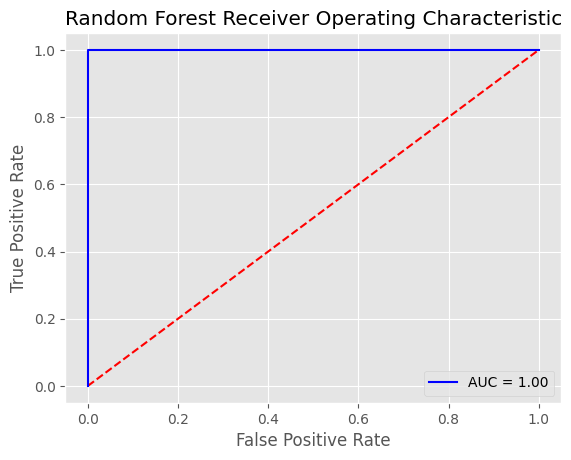

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds = clf.predict(X_test)
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

#load the pyplot tool from matplotlib library
import matplotlib.pyplot as plt
plt.title('Random Forest Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

K-Fold Cross-Validation Scores: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Mean Accuracy: 1.0

Training Data Results
Training accuracy of DecisionTreeClassifier is 1.0
precision:  tf.Tensor(0.9999999999933501, shape=(), dtype=float64)
recall:  tf.Tensor(0.9999999999933501, shape=(), dtype=float64)
f1-score:  tf.Tensor(0.9999999499933526, shape=(), dtype=float64)
ROC AUC : 1.0000

Testing Data Results
Testing accuracy of DecisionTreeClassifier is 1.0
precision:  tf.Tensor(0.9999999999843235, shape=(), dtype=float64)
recall:  tf.Tensor(0.9999999999843235, shape=(), dtype=float64)
f1-score:  tf.Tensor(0.9999999499843261, shape=(), dtype=float64)
ROC AUC : 1.0000


Text(0.5, 1.0, 'Decision Tree Classifier Confusion Matrix')

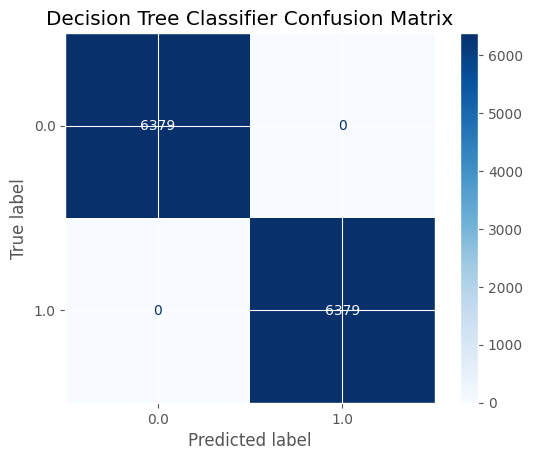

In [ ]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier


# Initialize the machine learning model
classifier2 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)

# Initialize a list to store the evaluation scores
scores = []

# Iterate through each fold
for train_indices, test_indices in fold_indices:
    # Train the model on the training data
    classifier2.fit(X_train, Y_train)

    # Make predictions on the test data
    y_pred = classifier2.predict(X_test)

    # Calculate the accuracy score for this fold
    fold_score = accuracy_score(Y_test, y_pred)

    # Append the fold score to the list of scores
    scores.append(fold_score)


# Calculate the mean accuracy across all folds
mean_accuracy = np.mean(scores)
print("K-Fold Cross-Validation Scores:", scores)
print("Mean Accuracy:", mean_accuracy)

train(classifier2, 'DecisionTreeClassifier')
# conf_matrix(classifier2)
disp = ConfusionMatrixDisplay.from_estimator(
        classifier2,
        X_test,
        Y_test,cmap=plt.cm.Blues
    )
disp.ax_.set_title("Decision Tree Classifier Confusion Matrix")


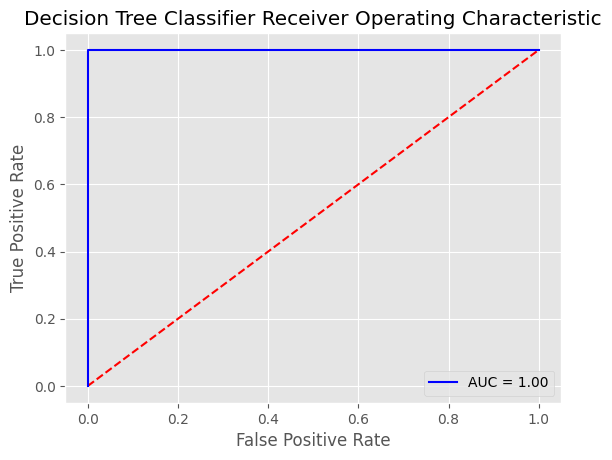

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds = classifier2.predict(X_test)
fpr, tpr, threshold = metrics.roc_curve(Y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

#load the pyplot tool from matplotlib library
import matplotlib.pyplot as plt
plt.title('Decision Tree Classifier Receiver Operating Characteristic')
plt.plot([0, 1], [0, 1],'r--')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()